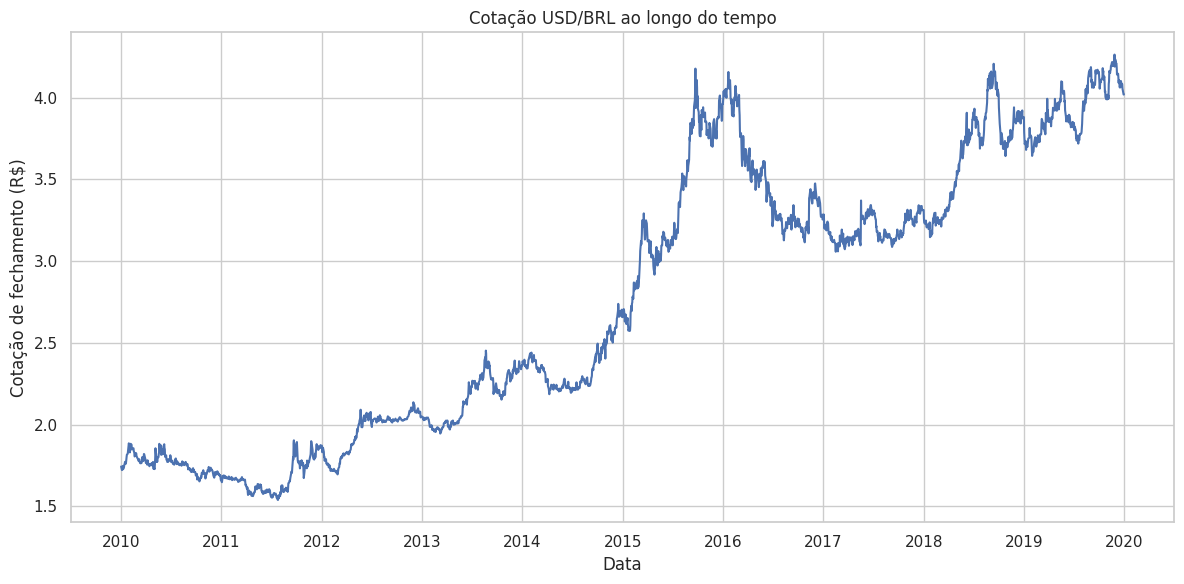

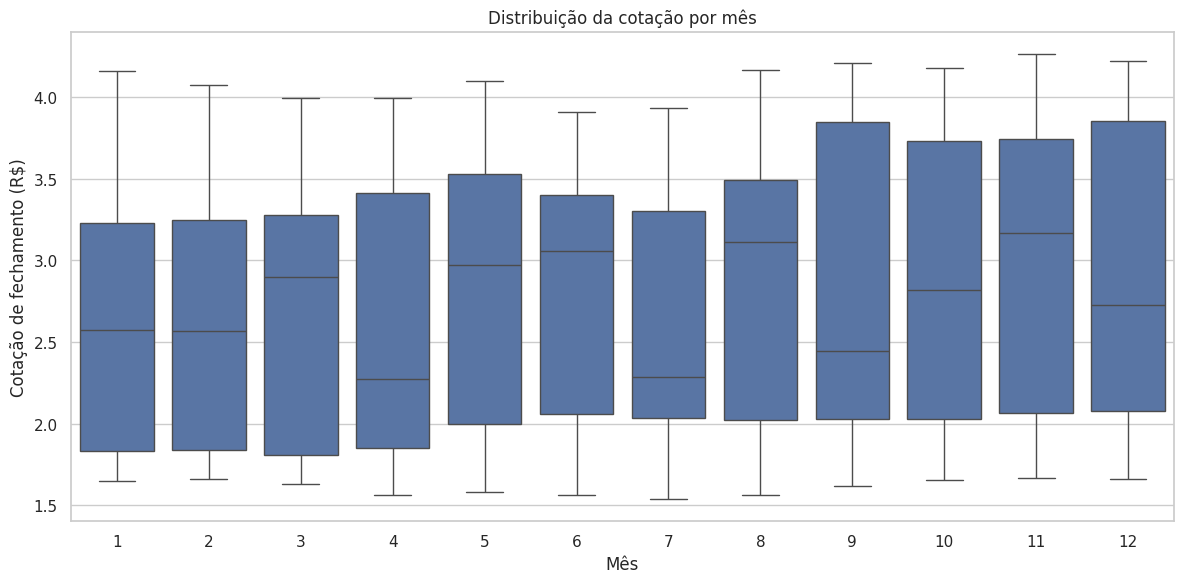

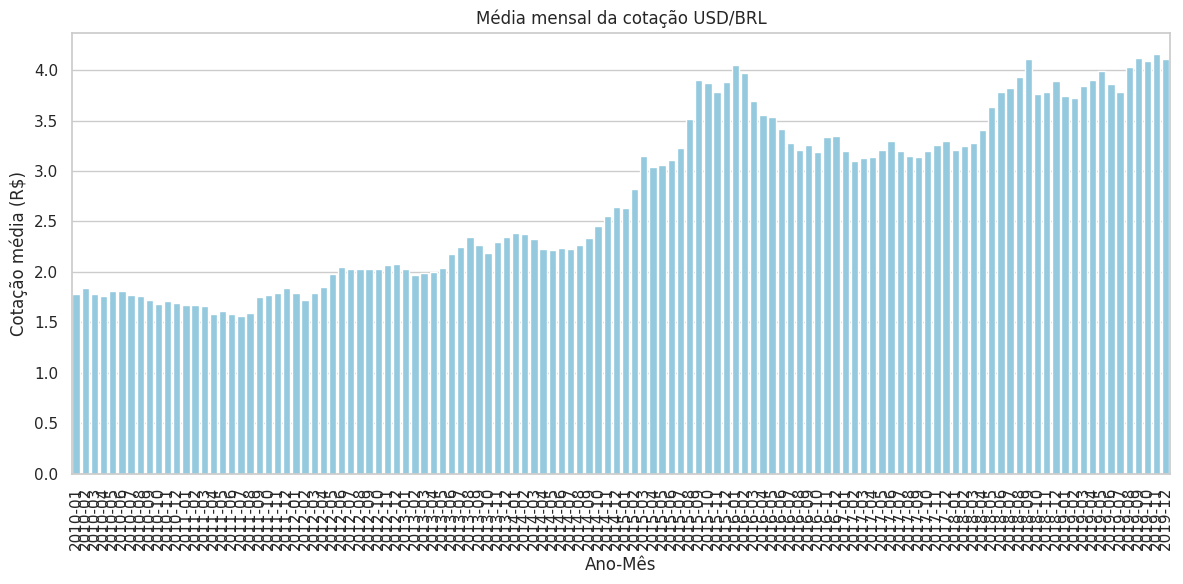

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carrega o dataset
df = pd.read_csv("USD_BRL_hist.csv")

# Converte a coluna de datas
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")

# Ordena por data
df.sort_values('Data', inplace=True)

# Gráfico 1: Evolução da cotação
plt.figure()
sns.lineplot(data=df, x="Data", y="USD_BRL")
plt.title("Cotação USD/BRL ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Cotação de fechamento (R$)")
plt.tight_layout()
plt.savefig("grafico1_evolucao.png")
plt.show()

# Gráfico 2: Boxplot por mês
df['Mes'] = df['Data'].dt.month
plt.figure()
sns.boxplot(x="Mes", y="USD_BRL", data=df)
plt.title("Distribuição da cotação por mês")
plt.xlabel("Mês")
plt.ylabel("Cotação de fechamento (R$)")
plt.tight_layout()
plt.savefig("grafico2_boxplot.png")
plt.show()

# Gráfico 3: Média mensal
df['AnoMes'] = df['Data'].dt.to_period('M')
media_mensal = df.groupby('AnoMes')['USD_BRL'].mean().reset_index()
media_mensal['AnoMes'] = media_mensal['AnoMes'].astype(str)

plt.figure()
sns.barplot(data=media_mensal, x='AnoMes', y='USD_BRL', color='skyblue')
plt.xticks(rotation=90)
plt.title("Média mensal da cotação USD/BRL")
plt.xlabel("Ano-Mês")
plt.ylabel("Cotação média (R$)")
plt.tight_layout()
plt.savefig("grafico3_media_mensal.png")
plt.show()
